# Part 1: 

In [20]:
import pandas as pd 
%matplotlib inline

def pandas_df_function(gct_link, summary=False):
    # Converts the link info in the form of bytes into strings and stores into dataframe
    dataframe = pd.read_csv(gct_link, sep='\t', encoding="utf-8", skiprows=2, error_bad_lines=False)
    
    if summary:
        print("Number of rows: " + str(len(dataframe)))
        print("Number of columns: " + str(len(dataframe.columns)))
    
    return dataframe
    

# Part 2a

In [21]:
target_url = 'https://datasets.genepattern.org/data/test_data/BRCA_minimal_60x19.gct'

# Call the method we wrote above on this link
df = pandas_df_function(target_url, True)
print(df)

Number of rows: 60
Number of columns: 21
        Name           Description  A7-A0CE-Normal  A7-A0CH-Normal  \
0     COL1A1    NCBI Gene ID: 1277      52818.7302      23289.8919   
1        SCD    NCBI Gene ID: 6319       5162.2222      54122.0498   
2       CPB1    NCBI Gene ID: 1360       5948.8889        844.0056   
3     COL1A2    NCBI Gene ID: 1278      44192.3810      40442.3131   
4     ADIPOQ    NCBI Gene ID: 9370       1317.1429      23352.3272   
5     COL3A1    NCBI Gene ID: 1281      39902.8571      27017.9596   
6        FN1    NCBI Gene ID: 2335      10179.6825      20482.9337   
7      ADH1B     NCBI Gene ID: 125       3812.6984      15351.9511   
8      AHNAK   NCBI Gene ID: 79026      45596.8254      87593.4180   
9     EEF1A1    NCBI Gene ID: 1915     159401.5873     143488.1053   
10       MGP    NCBI Gene ID: 4256     206810.4762      79636.6714   
11     PLIN4  NCBI Gene ID: 729359       5758.4127     108069.9577   
12    IGFBP5    NCBI Gene ID: 3488       9213.968

# Part 2b

In [22]:
url_2 = "https://datasets.genepattern.org/data/test_data/BRCA_large_20783x40.gct"

# Call the function we wrote in part 1 on url_2
df_2b = pandas_df_function(url_2)
print(df_2b)

             Name                                        Description  \
0          TSPAN6                                      tetraspanin 6   
1            TNMD                                        tenomodulin   
2            DPM1  dolichyl-phosphate mannosyltransferase subunit...   
3           SCYL3                           SCY1 like pseudokinase 3   
4        C1orf112                chromosome 1 open reading frame 112   
...           ...                                                ...   
20778       HCP5B               HLA complex P5B (non-protein coding)   
20779   SPRY4-IT1                        SPRY4 intronic transcript 1   
20780  AC018638.8                                                NaN   
20781   LINC02246        long intergenic non-protein coding RNA 2246   
20782   LINC01144        long intergenic non-protein coding RNA 1144   

       A7-A0CE-normal  A7-A0CH-normal  A7-A0D9-normal  A7-A0DB-normal  \
0              5404.0          5030.0          3616.0         

# Part 3

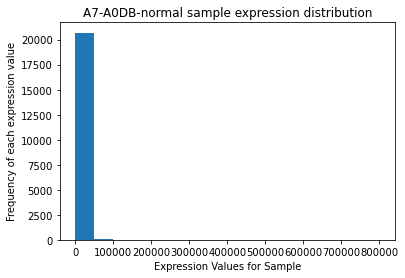

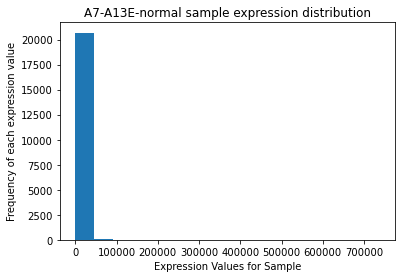

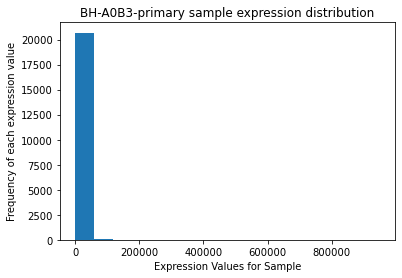

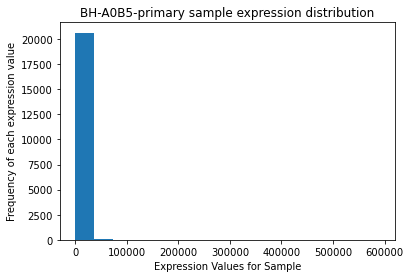

In [23]:
import matplotlib.pyplot as plt 
import math


# For each given sample, graph the expression value versus relative frequency of value 
def graph_sample_histogram(sample_expression_data, sample_name):
    data_list = []
    for val in sample_expression_data:
        data_list.append(int(val))
    
    
    bin_number = int(1 + math.ceil(math.log(len(data_list), 2)))
    
    # Input is the data, the number of bins, and the range of x values
    plt.hist(data_list, bin_number, range=(0, max(data_list) + 100))
    
    # Adding x and y axis labels and a title
    plt.ylabel("Frequency of each expression value")
    plt.xlabel("Expression Values for Sample") 
    plt.title(sample_name)
    
    plt.show()
    
          
sample_list = ["A7-A0DB-normal", "A7-A13E-normal", "BH-A0B3-primary", "BH-A0B5-primary"]

# Iterates over sample list to create histograms for each sample using the method I wrote above
for sample in sample_list:
    sample_name = sample + " sample expression distribution"
    sample_data = df_2b[sample]
    
    graph_sample_histogram(sample_data, sample_name)
    


# Part 4

In [24]:
import pandas as pd

sample_list = ["A7-A0DB-normal", "A7-A13E-normal", "BH-A0B3-primary", "BH-A0B5-primary"]
mean_list = []
median_list = []
standard_deviation_list = []

data = {}
#data = {sample_name: [], mean: [], median: [], standard_deviation: []}



for sample in sample_list:
    mean_list.append(df_2b[sample].mean())
    median_list.append(df_2b[sample].median())
    standard_deviation_list.append(df_2b[sample].std())


# Setting the 4 keys equal to lists we created above 
data["sample_name"] = sample_list
data["mean"] = mean_list
data["median"] = median_list
data["standard_deviation"] = standard_deviation_list

# Create a dataframe using a dictionary
df = pd.DataFrame(data)
print(df)


       sample_name         mean  median  standard_deviation
0   A7-A0DB-normal  2354.674445   362.0        13973.914409
1   A7-A13E-normal  2380.702593   427.0        13373.496798
2  BH-A0B3-primary  2899.012414   532.0        14901.907369
3  BH-A0B5-primary  2852.137083   688.0        10702.695938


# Part 5a


In [28]:
#Only rows whose max is greater than 100 remain

# Approach: 
# Find which rows have max values less than 100
# Based on these row indexes, remove these indexes from the list 
# Find the max value for each row


url_2 = "https://datasets.genepattern.org/data/test_data/BRCA_large_20783x40.gct"
df_2b = pandas_df_function(url_2)

def filter_data(url): 
    max_per_row = df_2b.max(axis=1)
    max_per_row_list = []


    # Converting the max_per_row dataframe to a list
    for val in max_per_row:
        max_per_row_list.append(val)


    # Drop row if max_per_row < 100 
    indexes_to_drop = []
    for i in range(len(max_per_row_list)):
        if max_per_row_list[i] < 100:
            indexes_to_drop.append(i)

    # print(len(indexes_to_drop))

    filtered_df = df_2b.drop(indexes_to_drop)
    return filtered_df

print(filter_data(url_2))


             Name                                        Description  \
0          TSPAN6                                      tetraspanin 6   
1            TNMD                                        tenomodulin   
2            DPM1  dolichyl-phosphate mannosyltransferase subunit...   
3           SCYL3                           SCY1 like pseudokinase 3   
4        C1orf112                chromosome 1 open reading frame 112   
...           ...                                                ...   
20778       HCP5B               HLA complex P5B (non-protein coding)   
20779   SPRY4-IT1                        SPRY4 intronic transcript 1   
20780  AC018638.8                                                NaN   
20781   LINC02246        long intergenic non-protein coding RNA 2246   
20782   LINC01144        long intergenic non-protein coding RNA 1144   

       A7-A0CE-normal  A7-A0CH-normal  A7-A0D9-normal  A7-A0DB-normal  \
0              5404.0          5030.0          3616.0         

# Part 5b

In [51]:
import matplotlib.pyplot as plt

url_to_use = "https://datasets.genepattern.org/data/test_data/BRCA_large_20783x40.gct" 
new_filtered_df = filter_data(url_to_use)

# Removes the first two columns which include the name and description 
new_filtered_df.drop(new_filtered_df.columns[[0, 1]], axis=1, inplace=True) 


sample_list = []
mean_list = []
median_list = []

for sample in new_filtered_df:
    sample_list.append(sample)
    mean_list.append(df_2b[sample].mean())
    median_list.append(df_2b[sample].median())

# Each of the samples should have a mean and median
sample_data = {}
    
    
sample_data["sample_names"] = sample_list
sample_data["mean"] = mean_list
sample_data["median"] = median_list

# Creating a dataframe by passing in a dictionary
sample_df = pd.DataFrame(sample_data)

# This displays a dataframe showing the mean and median for each sample 
print(sample_df)
    

       sample_names         mean  median
0    A7-A0CE-normal  3308.877255   814.0
1    A7-A0CH-normal  3046.316942   630.0
2    A7-A0D9-normal  2628.131550   350.0
3    A7-A0DB-normal  2354.674445   362.0
4    A7-A13E-normal  2380.702593   427.0
5    A7-A13F-normal  2493.380215   527.0
6    A7-A13G-normal  3509.542463   454.0
7    AC-A23H-normal  3396.675312   659.0
8    AC-A2FB-normal  3675.583169   792.0
9    AC-A2FF-normal  3743.660492   935.0
10   AC-A2FM-normal  2714.893663   578.0
11   BH-A0AU-normal  2436.466679   641.0
12   BH-A0AY-normal  2412.727951   567.0
13   BH-A0AZ-normal  3216.765337   836.0
14   BH-A0B3-normal  2879.876149   772.0
15   BH-A0B5-normal  3129.721455   358.0
16   BH-A0B7-normal  2337.598326   599.0
17   BH-A0B8-normal  2765.395516   382.0
18   BH-A0BA-normal  2185.575615   514.0
19   BH-A0Bc-normal  2430.835442   530.0
20  A7-A0CE-primary  3093.171727   572.0
21  A7-A0CH-primary  2263.303710   448.0
22  A7-A0D9-primary  2665.603955   501.0
23  A7-A0DB-prim

# Part 5b: Histograms of the 4 Samples


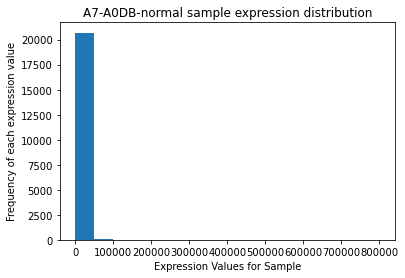

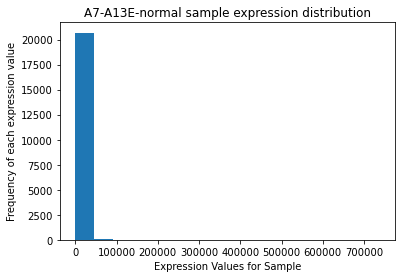

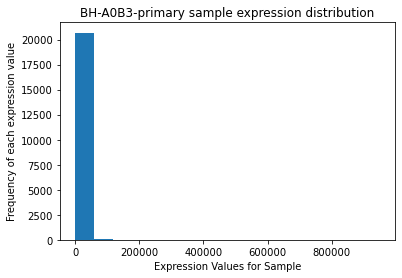

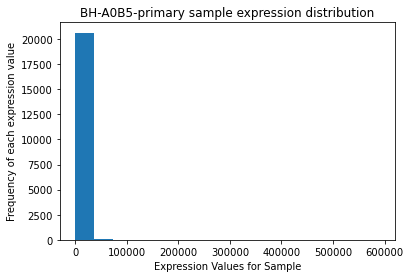

In [52]:
sample_list = ["A7-A0DB-normal", "A7-A13E-normal", "BH-A0B3-primary", "BH-A0B5-primary"]

# Graphing the histograms for each sample using the method we wrote in part 3
for sample in sample_list:
    sample_name = sample + " sample expression distribution"
    sample_data = df_2b[sample]
    
    graph_sample_histogram(sample_data, sample_name)